In [23]:
# load packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# import keras
# from keras import metrics
# from keras import regularizers
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Activation
# from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import Adam, RMSprop
# from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
# from keras.utils import plot_model
# from keras.models import load_model

In [88]:
data = pd.read_csv("data/house-price-dataset.csv")
data.shape, data.columns

((21613, 21),
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15'],
       dtype='object'))

In [89]:
# display all columns
pd.set_option('display.max_columns', 100) # max 100 columns

In [90]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [91]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
# get dates
data["sale_year"] = pd.to_numeric(data.date.apply(lambda x: str(x)[:4]))
data["sale_month"] = pd.to_numeric(data.date.apply(lambda x: str(x)[4:6]))
data["sale_day"] = pd.to_numeric(data.date.apply(lambda x: str(x)[6:8]))

data = pd.DataFrame(data, columns=[
    "sale_year", "sale_month", "sale_day",
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "condition", "grade", "sqft_above", "sqft_basement", "yr_built",
    "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price"
])

label_col = "price"

In [22]:
data.head(5)

,sale_year,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,13,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,2014,12,9,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000.0
2,2015,2,25,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,2014,12,9,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,2015,2,18,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000.0


In [ ]:
# normalize data
for col in data.columns:
    data[[col]] = np.mean(data[[col]])

## Split data for training and validation

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data[[col for col in data.columns if col != "price"]], data[["price"]], test_size=0.3)

In [ ]:
# normalize data


In [28]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15129, 18), (15129, 1), (6484, 18), (6484, 1))

# Model

In [73]:
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="mean_absolute_error", patience=50, verbose=1, mode="auto")
]

In [85]:
# initiate sequential model
baseline_model = tf.keras.Sequential()
baseline_model.add(tf.keras.layers.Dense(units=64, activation="tanh", input_shape=(x_train.shape[1], ))) # input layer

baseline_model.add(tf.keras.layers.Dense(units=128, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # first hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% fo nodes

baseline_model.add(tf.keras.layers.Dense(units=32, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% fo nodes

baseline_model.add(tf.keras.layers.Dense(units=16, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% fo nodes

baseline_model.add(tf.keras.layers.Dense(units=32, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% fo nodes

baseline_model.add(tf.keras.layers.Dense(units=8, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer

baseline_model.add(tf.keras.layers.Dense(units=1))

baseline_model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)

print(baseline_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_80 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
__________

In [86]:
history = baseline_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=1000,
    shuffle=True,
    verbose=True,
    validation_data=(x_test, y_test),
    callbacks=keras_callbacks
)

Train on 15129 samples, validate on 6484 samples
Epoch 1/1000
15129/15129 [==============================] - 2s 139us/step - loss: 424367671131.2557 - mean_absolute_error: 539086.1602 - val_loss: 424268275444.1555 - val_mean_absolute_error: 535746.6847
Epoch 2/1000
15129/15129 [==============================] - 0s 23us/step - loss: 372447247547.9601 - mean_absolute_error: 485796.0357 - val_loss: 271361223897.9395 - val_mean_absolute_error: 365373.4467
Epoch 3/1000
15129/15129 [==============================] - 0s 23us/step - loss: 176881484628.2842 - mean_absolute_error: 267452.5478 - val_loss: 143516885098.1271 - val_mean_absolute_error: 241557.3228
Epoch 4/1000
15129/15129 [==============================] - 0s 23us/step - loss: 152076839409.4817 - mean_absolute_error: 250773.8208 - val_loss: 142559107356.2690 - val_mean_absolute_error: 237463.7063
Epoch 5/1000
15129/15129 [==============================] - 0s 23us/step - loss: 150109574643.7153 - mean_absolute_error: 248974.7894 - va

Epoch 41/1000
15129/15129 [==============================] - 0s 23us/step - loss: 141160693009.5134 - mean_absolute_error: 239652.9523 - val_loss: 134776659295.8618 - val_mean_absolute_error: 231060.5358
Epoch 42/1000
15129/15129 [==============================] - 0s 23us/step - loss: 140970075927.5712 - mean_absolute_error: 239421.0575 - val_loss: 135873140130.8230 - val_mean_absolute_error: 225520.3455
Epoch 43/1000
15129/15129 [==============================] - 0s 23us/step - loss: 141197121408.8884 - mean_absolute_error: 238796.1315 - val_loss: 134692012304.8982 - val_mean_absolute_error: 234050.7036
Epoch 44/1000
15129/15129 [==============================] - 0s 22us/step - loss: 141903390394.9786 - mean_absolute_error: 239907.8166 - val_loss: 136595408515.7113 - val_mean_absolute_error: 223947.8868
Epoch 45/1000
15129/15129 [==============================] - 0s 23us/step - loss: 141538450185.6958 - mean_absolute_error: 240418.7407 - val_loss: 135523696569.2486 - val_mean_absolute

15129/15129 [==============================] - 0s 23us/step - loss: 139486955823.0916 - mean_absolute_error: 238775.5629 - val_loss: 137154877047.0771 - val_mean_absolute_error: 222513.1036
Epoch 82/1000
15129/15129 [==============================] - 0s 23us/step - loss: 139742189264.3670 - mean_absolute_error: 239330.3111 - val_loss: 138247617468.4072 - val_mean_absolute_error: 221454.1282
Epoch 83/1000
15129/15129 [==============================] - 0s 23us/step - loss: 139892490150.6564 - mean_absolute_error: 238302.7460 - val_loss: 135297887985.6286 - val_mean_absolute_error: 225828.9379
Epoch 84/1000
15129/15129 [==============================] - 0s 23us/step - loss: 138687212145.2701 - mean_absolute_error: 237595.9139 - val_loss: 134796598179.1388 - val_mean_absolute_error: 227714.8722
Epoch 85/1000
15129/15129 [==============================] - 0s 23us/step - loss: 139682525483.7073 - mean_absolute_error: 238060.6052 - val_loss: 137057312186.8279 - val_mean_absolute_error: 222632

15129/15129 [==============================] - 0s 23us/step - loss: 138720939438.2709 - mean_absolute_error: 236580.7668 - val_loss: 137808283914.5811 - val_mean_absolute_error: 221820.9026
Epoch 122/1000
15129/15129 [==============================] - 0s 23us/step - loss: 138032079584.9497 - mean_absolute_error: 236973.3744 - val_loss: 137267647361.0265 - val_mean_absolute_error: 222308.8862
Epoch 123/1000
15129/15129 [==============================] - 0s 23us/step - loss: 138292154979.5979 - mean_absolute_error: 237107.6759 - val_loss: 136628129900.6539 - val_mean_absolute_error: 223051.3628
Epoch 124/1000
15129/15129 [==============================] - 0s 23us/step - loss: 138238929956.0759 - mean_absolute_error: 237497.8529 - val_loss: 136467568995.0204 - val_mean_absolute_error: 223293.8937
Epoch 125/1000
15129/15129 [==============================] - 0s 23us/step - loss: 138242909200.1766 - mean_absolute_error: 237707.5051 - val_loss: 137752596790.8008 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 23us/step - loss: 137914084141.7040 - mean_absolute_error: 236926.0174 - val_loss: 144601631522.2702 - val_mean_absolute_error: 220562.2708
Epoch 162/1000
15129/15129 [==============================] - 0s 23us/step - loss: 137668739159.7192 - mean_absolute_error: 236590.3239 - val_loss: 142791033013.9321 - val_mean_absolute_error: 220215.0913
Epoch 163/1000
15129/15129 [==============================] - 0s 24us/step - loss: 137477176165.2054 - mean_absolute_error: 236814.0453 - val_loss: 140074883174.3368 - val_mean_absolute_error: 220444.9382
Epoch 164/1000
15129/15129 [==============================] - 0s 26us/step - loss: 136874072386.3140 - mean_absolute_error: 236883.7798 - val_loss: 139747174388.6292 - val_mean_absolute_error: 220564.4799
Epoch 165/1000
15129/15129 [==============================] - 0s 23us/step - loss: 137314463024.1068 - mean_absolute_error: 236239.4034 - val_loss: 139715433506.7440 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 23us/step - loss: 137178546064.4558 - mean_absolute_error: 236247.1724 - val_loss: 140005540891.1635 - val_mean_absolute_error: 220461.3248
Epoch 202/1000
15129/15129 [==============================] - 0s 23us/step - loss: 136831072747.7962 - mean_absolute_error: 236245.6275 - val_loss: 140146932041.7520 - val_mean_absolute_error: 220423.2723
Epoch 203/1000
15129/15129 [==============================] - 0s 23us/step - loss: 136108747144.4352 - mean_absolute_error: 236346.9160 - val_loss: 142865902122.6404 - val_mean_absolute_error: 220238.6050
Epoch 204/1000
15129/15129 [==============================] - 0s 23us/step - loss: 136582615334.2925 - mean_absolute_error: 235919.2796 - val_loss: 141240116822.2282 - val_mean_absolute_error: 220239.7883
Epoch 205/1000
15129/15129 [==============================] - 0s 23us/step - loss: 137388991448.9460 - mean_absolute_error: 235891.7111 - val_loss: 138361424492.3381 - val_mean_absolute_error: 22

In [93]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [94]:
# accumulate data
train_mae, test_mae = history.history["mean_absolute_error"], history.history["val_mean_absolute_error"]
loss, val_loss = history.history["loss"], history.history["val_loss"]

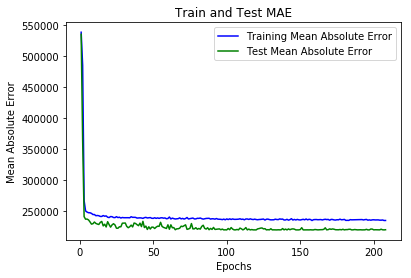

In [95]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, train_mae, "b", label="Training Mean Absolute Error", color="blue")
plt.plot(epochs, test_mae, "b", label="Test Mean Absolute Error", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Train and Test MAE")
plt.show()

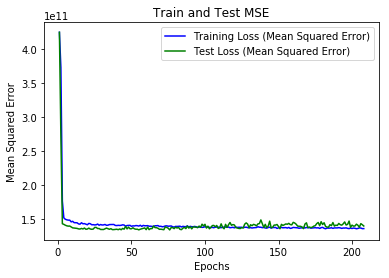

In [96]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b", label="Training Loss (Mean Squared Error)", color="blue")
plt.plot(epochs, val_loss, "b", label="Test Loss (Mean Squared Error)", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test MSE")
plt.show()